In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housing=pd.read_csv('housing.csv')

In [5]:
housing.shape

(20640, 10)

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

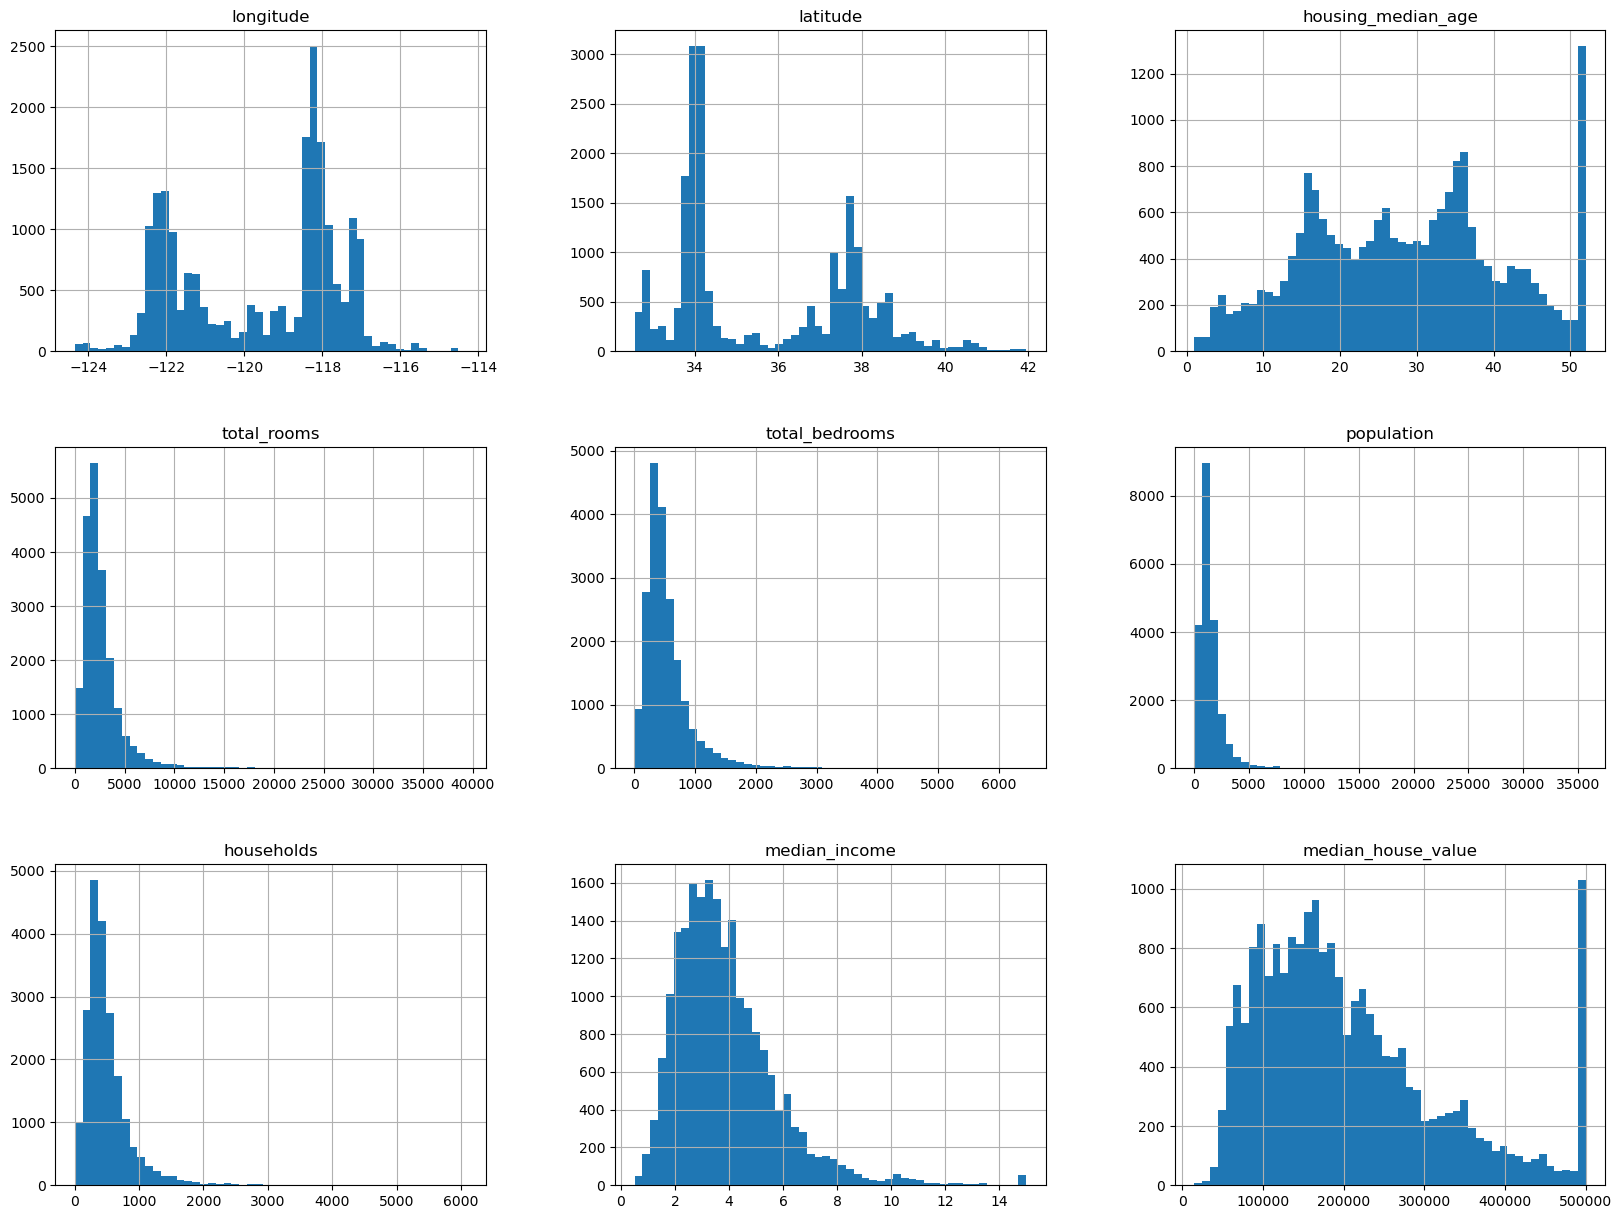

In [11]:
housing.hist(bins=50,figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

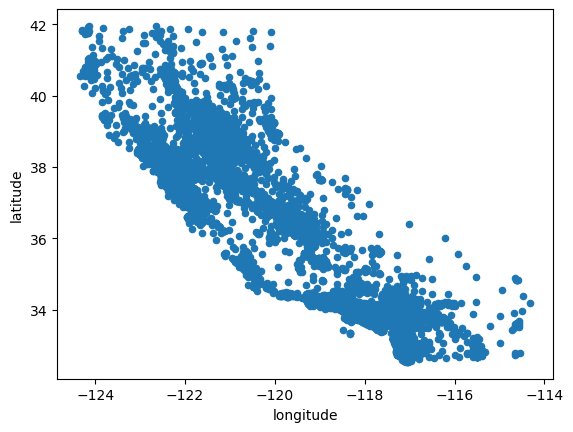

In [12]:
housing.plot(kind="scatter",x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

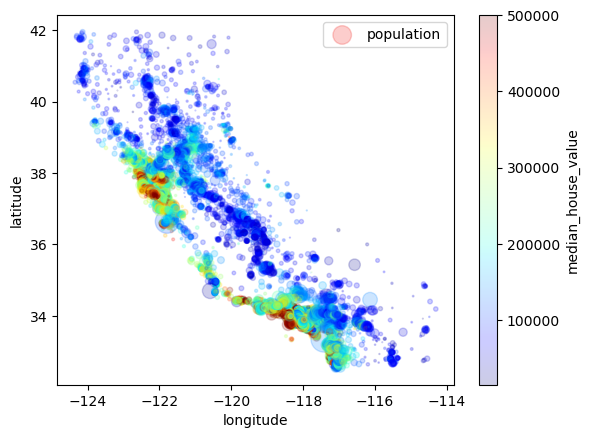

In [13]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.2,
            s=housing["population"]/100, label="population",
            c="median_house_value",cmap=plt.get_cmap("jet"))

<Axes: xlabel='longitude', ylabel='latitude'>

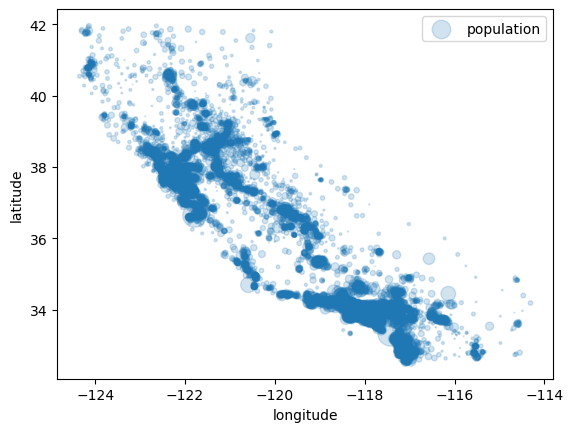

In [14]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.2,
            s=housing["population"]/100, label="population")

<Axes: xlabel='longitude', ylabel='latitude'>

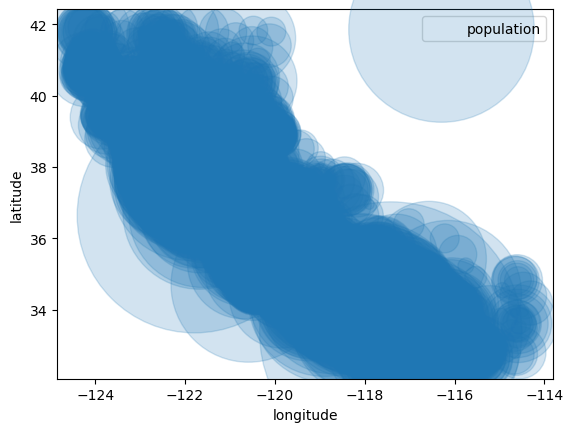

In [23]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.2,
            s=housing["population"], label="population")

In [15]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


C:\Users\hp\AppData\Local\Temp\ipykernel_8840\2082408667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [17]:
housing_na=housing.dropna(subset=["total_bedrooms"])
housing_na.shape

(20433, 10)

In [18]:
pd.get_dummies(housing_na.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [19]:
dummies=pd.get_dummies(housing_na.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [20]:
dummies=pd.get_dummies(housing_na.ocean_proximity)
housing_na_dummies=pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [22]:
dummies=pd.get_dummies(housing_na.ocean_proximity)
housing_na_dummies=pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()
housing_clean=housing_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')


In [23]:
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [24]:
#Create feature and label datasets
X=housing_clean.drop(columns=['median_house_value'])
X.head()
y=housing_clean['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1984)

In [27]:
from sklearn.linear_model import LinearRegression 
OLS = LinearRegression()

OLS.fit(X_train,y_train)

LinearRegression()

In [31]:
#display the intercept and coefficient of the OLS model
print(OLS.intercept_)


-2146719.4958723723


In [35]:
print ("Intercept is " + str(OLS.intercept_))
print ("The Set of coefficients are " + str(OLS.coef_))
print ("The R-Squared value is " + str(OLS.score(X_train,y_train)))

Intercept is -2146719.4958723723
The Set of coefficients are [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
The R-Squared value is 0.6433902949192565


In [37]:
#predicting with OLS
y_pred=OLS.predict(X_test)
performance=pd.DataFrame({'Predections':y_pred,'Actual Values':y_test})
performance.head()


,Predections,Actual Values
15175,315646.738470,328200.0
15424,235926.156196,156900.0
16212,157003.325611,87200.0
15356,172404.340246,141000.0
1899,82931.270634,100800.0


In [38]:
y_pred=OLS.predict(X_test)
performance=pd.DataFrame({'Predections':y_pred,'Actual Values':y_test})
performance['error']=performance['Actual Values']-performance['Predections']
performance.head()

,Predections,Actual Values,error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


In [39]:
#preparing data for plotting

performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,Predections,Actual Values,error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


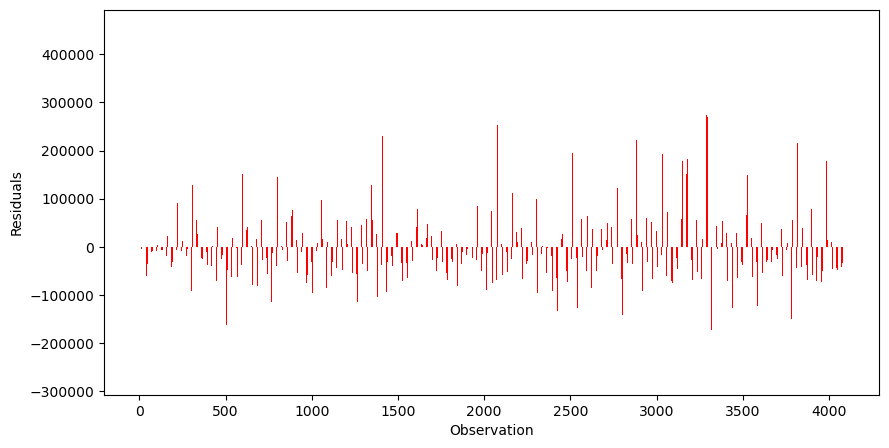

In [42]:
#plot the residuals

fig = plt.figure(figsize=(10.,5))
plt.bar('index', 'error', data=performance, color='red', width=0.3)
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.show()

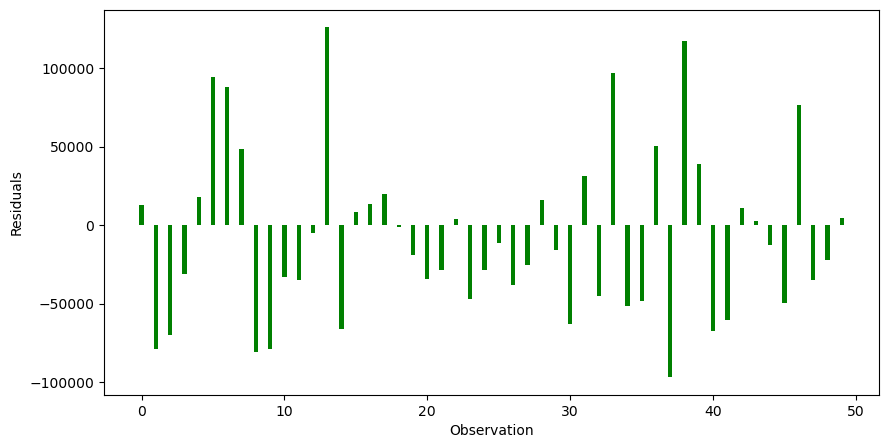

In [47]:
fig = plt.figure(figsize=(10.,5))
plt.bar('index', 'error', data=performance[:50], color='green', width=0.3)
plt.xlabel("Observation")
plt.ylabel("Residuals")
plt.show()

In [50]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
X_train.head()

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
6885,1.0,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,1,0,0,0
4220,1.0,-118.28,34.12,50.0,2384.0,312.0,836.0,337.0,12.8763,1,0,0,0
9915,1.0,-122.31,38.33,21.0,1922.0,344.0,1051.0,342.0,3.6042,0,0,1,0
294,1.0,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,0,0,1,0
6574,1.0,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,1,0,0,0


In [51]:
X_train=sm.add_constant(X_train)
nicerOLS=sm.OLS(y_train, X_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2456.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:53:24   Log-Likelihood:            -2.0522e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.147e+06   1.05e+05    -20.413      0.000   -2.35e+06   -1.94e+06
longitude          -2.722e+04   1141.708    -23.841      0.000   -2.95e+04    -2.5e+04
latitude           -2.612e+04   1125.571    -23.208      0.000   -2.83e+04   -2.39e+04
housing_median_age  1036.3175     49.179     21.072      0.000     939.922    1132.713
total_rooms           -6.3977      0.891     -7.184      0.000      -8.143      -4.652
total_bedrooms        99.7707      7.613     13.105      0.000      84.848     114.694
population           -37.3546      1.189    -31.405      0.000     -39.686     -35.023
households            49.9035      8.223      6.069      0.000      33.786      66.021
median_income       3.937e+04    382.254    102.983      0.000    3.86e+04    4.01e+04
<1H OCEAN           -1.49e+05   3.43e+04     -4.339      0.000   -2.16e+05   -8.17e+04
INLAND             -1.878e+05   3.44e+04     -5.456      0.000   -2.55e+05    -1.2e+05
NEAR BAY           -1.519e+05   3.44e+04     -4.416      0.000   -2.19e+05   -8.45e+04
NEAR OCEAN         -1.457e+05   3.44e+04     -4.239      0.000   -2.13e+05   -7.83e+04
==============================================================================
Omnibus:                     4103.497   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16258.145
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     8.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""